# **Creación de paletas de colores para obras de arte**

### Daniel Aguirre y Manuel Mosquera

# Resumen

El Banco de Archivos Digitales de Artes en Colombia – BADAC – propone explorar una de sus mayores necesidades que es un motor de búsqueda de acuerdo a las paletas de colores de una colección. En este caso, BADAC proporcionó una colección de 1238 imágenes para extraer las paletas de colores y hacer un motor de búsqueda con base a estas. Para el desarrollo de este proyecto, se analizan metodologías en el campo de cuantización de color (específicamente en la reducicón de colores de una imagen) que son estado del arte (KMeans y PNN) y se proponen nuevas metodologías. Adicionalmente, se explora el motor de búsqueda como un cubo en el espacio RGB que permita encontrar colores próximos/similares en el espacio a partir del centro del cubo (color rgb) dado.

# Introducción

El Banco de Archivos Digitales de Artes en Colombia – BADAC – cuenta con acervos documentales como catálogos razonados, fondos documentales y colecciones. Los catálogos razonados son el registro digital total o parcial de las obras de un artista, mientras que los fondos documentales corresponden a los archivos digitalizados, acumulada a lo largo de los años por artistas, instituciones, creadores e investigadores de la historia del arte de Colombia. Por su parte, las colecciones son agrupaciones fácticas de documentación, ordenada por su tipología documental, temática, época, etc.

En el ámbito de BADAC, que alberga una amplia gama de documentación y obras de arte de Colombia,
se presenta la necesidad de un motor de búsqueda que pueda filtrar obras según su paleta de colores.
Para que este motor funcione de manera efectiva, es crucial asignar y determinar las paletas de colores
que mejor representan cada obra de arte. Este paso es fundamental para garantizar resultados de
búsqueda precisos y relevantes.

El objetivo de este proyecto es desarrollar e implementar un motor de búsqueda para obras de arte del Banco de Archivos Digitales
de Artes de Colombia que permita localizar y agrupar obras de arte con base en criterios cromáticos
predefinidos.

Para resolver el problema planteado se encuentra en la literatura que el área de cuantización de color tiene objetivos similares que permitirían el planteamiento de soluciones con algoritmos probados y evaluados en tareas similares. La cuantización de colores es una tarea común en el procesamiento de imágenes, esto se debe a que el
número de colores de las imágenes puede llegar a ser muy alto, dificultando así su almacenamiento y su
análisis. Para solucionar este problema se han desarrollado diversos algoritmos que permiten reducir
el número de colores de la imagen, iniciando en 1980 con el desarrollo del algoritmo Median-cut.

Para nuestro poblema partícular, de extraer una paleta de colores representativa de una imagen,
podemos reusar los algoritmos desarrollados sobre cuantización de colores para generar el número
de colores deseado en nuestra paleta, y luego sencillamente se podría ordenar la paleta de colores por
la frecuencia de píxeles en la imagen para cada uno de los grupos de colores.
La cuantización de colores consiste en 2 fases principales:
1. Creación de la paleta de colores: Selección de un pequeño set de colores extraídos de la imagen
original.
2. Mapeo de píxeles: Consiste en el mapeo de cada píxel de la imagen a un color de la paleta de colores.

El principal objetivo de la cuantización de colores es reducir el número de colores de una imagen
generando la mínima distorción posible.
Como se puede observar en la **Figura 1**, la cuantización de colores puede servirnos para reducir en gran
medida el número de bits de la imagen sin perdida sustancial de información, por lo menos para la
percepción visual humana. Por ejemplo, las diferencias de la imagen en 64 colores son poco percebtibles
si se le compara con la imagen original de 183.525 colores.
Para solucionar el problema planteado en nuestro proyecto, haremos uso de distintas técnicas encontradas en la literatura, y escogeremos la técnica que mejor resultados arroje según la valoración cualitativa
de nuestro cliente, y tendremos en cuenta el costo computacional de cada método para evaluar su
viabilidad práctica.

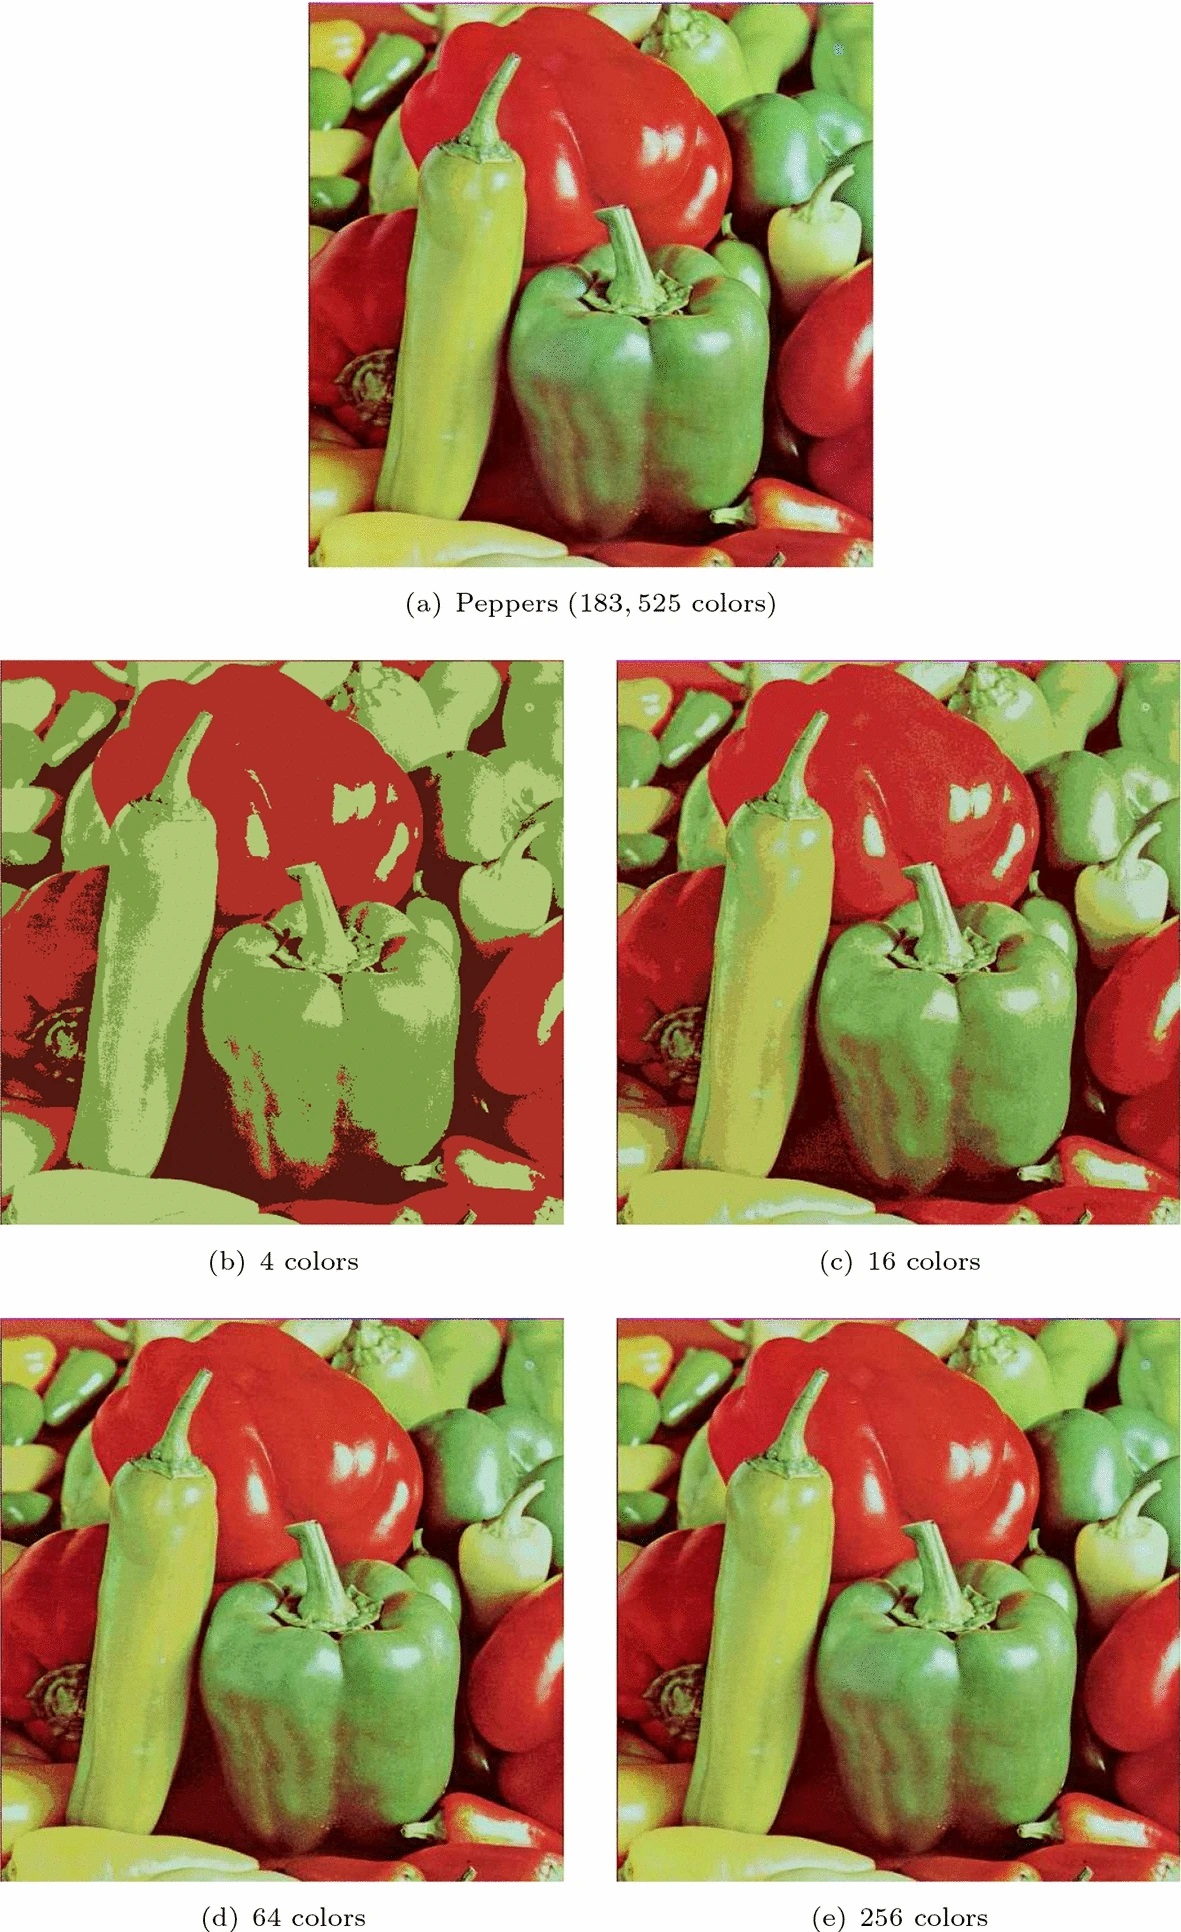

In [6]:
from IPython.display import Image, display

display(Image(filename='./imagenes_paper/Imagen_cuantizada.jpg', width=500))

**Figura 1** Imagen cuantizada con el algoritmo Median Cut tomada de (Celebi, M.E, 2023)

# Estado del arte

Aunque nuestro problema se relaciona con la cuantización de color, los objetivos de nuestro proyecto divergen en cuanto a que la paleta de colores que buscamos no necesariamente aquella que minimiza la pérdida de información de la imagen original sino aquella que cualitativamente represente de mejor manera la imagen. Adicionalmente, la paleta de colores objetivo consiste de únicamente 6 colores mientras que la mayoría de algoritmos de cuantización de color fueron pensados inicialmente para más colores (usualmente 32, 64 o 256). Es por estas razones que se tomaron distintos algoritmos de cuantización de color para evaluar sus resultados en el problema específico planteado.

## Median cut

Este algoritmo es una técnica jerarquíca divisional que consiste en tomar la imagen e irla dividiendo en grupos hasta conformar el número de grupos deseado. Más a detalle, consiste en coger todos los píxeles de la imágen y ordenarlos por el valor del canal de
color con mayor rango de la imágen, esta operación sería una aproximación de encontrar el canal que presenta mayor varianza dentro del grupo. Es decir, si en la imagen original el canal de color de mayor rango
es el azul, entonces se ordenarán todos los píxeles según su valor para el cana azul. Luego se dividen
los píxeles en dos grupos por su mediana. Para conseguir el número deseado de colores se escoge el grupo que presente mayor rango en alguno de sus canales, se vuelve a
ordenar los píxeles del grupo por el canal de mayor rango y se realiza la división en el punto mediano.
Para definir el color representativo de cada grupo, se toma el promedio del color de cada uno de los
píxeles del grupo.

## Pairwise Nearest Neighbors (PNN)

Esta técnica es del tipo jerarquíca aglomerativa. Es decir, que de manera contraria a Median-cut, cada píxel inicia en su propio grupo, y estos se van combinando hasta alcanzar el número de grupos deseados. El algoritmo consiste en que se comparan todos los pares posibles de combinaciones, y por cada combinación se calcula su impacto en el MSE de la siguiente manera $d_{a,b} = {n_a n_b \over n_a + n_b} * ||c_a - c_b||^2$, en donde $a,b$ corresponden a los índices de los grupos a evaluar, $n$ coresponde al tamaño del grupo (número de píxeles), y $c$ al color representante del grupo (centroide, media del grupo). Con base en esta distancia, se escogen para combinar el par de grupos que tengan el menor impacto en el MSE. Este proceso se realiza iterativamente hasta alcanzar los grupos propuestos.

## KMeans

Esta técnica de clusterización nos permite elegir el número de colores que queremos hagan parte de
nuestra paleta de colores. Como queremos obtener una clusterización por color, representamos cada
imágen como una lista de elementos donde cada elemento es representado por 3 dimensiones, una por
cada canal de color.
Luego se realiza una operación iterativa hasta convergencia en donde se va reduciendo la distancia
entre cada uno de los valores originales de la imagen y los k centroides definidos.
Como resultado de este algoritmo obtendríamos los k centroides, que representarían los colores de
nuestra paleta de colores.

# Método

Esta sección se compone de los etapas de procesamiento, y evaluación llevadas a cabo para crear y comparar distintos métodos de creación de la paleta de colores en una colección de imágenes de la artista Beatriz Gonzáles facilitada por BADAC que consta de 1238 imágenes.

## Técnicas de preprocesamiento

Teniendo en cuenta que se busca crear una paleta de colores representativa de la imagen, se plantea el uso de algunas técnicas de preprocesamiento de imágenes con el objetivo de reducir posible ruido en las imágenes de la colección y homogeneizar los colores de la imagen para facilitar la tarea de los algoritmos. Adicionalmente, algunas de las transformaciones son imperativas para la ejecución de algunos de los algoritmos, para reducir los tiempos de cómputo y mejorar la viabilidad práctica de las soluciones implementadas.

**Filtro Promedio**.
En nuestros experimentos se evaluó el uso de un filtro promedio con un tamaño de kernel de 9X9, con el fin de suavizar la imágen y facilitar la segmentación de la imágen por color.

**Bit-cutting**. Esta técnica se extrajo de la literatura, en la que se hace uso de un recorte de bits para reducir en una primera instancia el número de colores presentes en la imágen. En nuestros experimentos, se uso esta técnica para reducir los colores de 256 a 32.

**Resize**. En busca de mejorar la eficiencia en el proceso de creación de paletas de color, se usó un reescalamiento de las imágenes para reducir el número de píxeles de la imagen. Para el algoritmo PNN, esta técnica fue imprescindible para reducir los tiempos de cómputo con el hardware disponible, utilizando imágenes de un máximo de 40.000 píxeles en total.

## Detalles técnicos de las implementaciones

**Median-cut**. Se encontró empirícamente que para mejorar la eficiencia del algoritmo era necesario que la imagen no superara el millón de píxeles. Adicionalmente, se encontró que la división del algoritmo por el punto mediano podía fallar. Se evidenció que la división por el punto mediano podía ocasionar en algunos casos, grupos con 0 píxeles. Por esta razón, fue necesario implementar reintentos de división por el segundo canal con mayor rango, luego por el segundo grupo, hasta encontrar una dvisión que no generar grupos vacíos.

**PNN**. La implementación de este algoritmo presentó importantes retos debido a la cantidad de operaciones realizadas por el algoritmo, traducidas en un alto tiempo de procesamiento por imagen. Este comportamiento se debe principalmente a dos razones: (1) que el algoritmo inicia con cada uno de los píxeles de su imagen en su propio grupo, por lo que deben realizarse un mínimo de $n-k$ combinaciones dónde $n$ es el número de píxeles de la imagen y $k$ es el número de grupos objetivo, y (2) para encontrar qué par de grupos deben combinarse, se deben evaluar todas las posibles combinaciones de los mismos.

En nuestra implementación, se decidió restringir el número de píxeles de las imágenes a un máximo de 40.000 píxeles, y se decicidió inicializar el algoritmo no con un píxel por grupo sino con 350 grupos. Para conformar estos 350 grupos iniciales, primero se definieron los centroides y posteriormente se asignó cada uno de los píxeles a su centroide más cercano, definiendo cercanía como su distancia euclideana. Para definir los 350 centroides se organizaron los píxeles de la imagen de acuerdo a la media de los 3 canales de colores, y se generaron particiones uniformes buscando cubrir todo el espacio de color utilizado por la imagen.


## Propuesta propia. Cuantización de color con redes neuronales
La red neuronal se compone de 4 capas convolucionales con max pooling, 3 capas ocultas y una capa de output del tamaño de la paleta * número de canales (en este caso, 3 por que trabajamos sobre el espacio RGB). Todas tiene función de activación Relu a excepción de la última capa, que tiene función de activación Sigmoide. Para regularización utilizamos la técnica de DropOut. Realizamos 3 implementaciones:
- Entrenamiento de la red desde cero.
- Entrenamiento de la red utilizando un modelo base (Transfer Learning).
- Red del modelo preentrenado sin entrenamiento.

El modelo base lo definimos con la misma arquitectura pero entrenandolo con imágenes del <a href="https://www.nga.gov/open-access-images/open-data.html" > National Gallery Art </a>.  Fueron alrededor de 50.000 imágenes.

Realmente en la literatura no se encuentra nada al respecto, por lo que la novedad está en la definición de la capa de salida y en la función de pérdida:
- La capa de salida: Consta de 18 neuronas (i.e., 6 colores x 3 canales cada color). Utilizamos la función de activación sigmoide y, no otras funciones (como softmax) por la independencia de las neuronas para cada canal de color. Si utilizaramos, por ejemplo, una función de activación softmax, la distribución de probabilidad sobre estas 18 neuronas no permitiría generar colores distintos. Una paleta que esté sobre los colores pasteles, por ejemplo, tiende hacia los blancos y, la función softmax al estar acotada en 1, no permitiría una paleta de colores que tiendan a un color más blanco. 

- La función de pérdida: Utilizamos una métrica MSE sobre la imagen cuantizada y la imagen original. Es decir, luego de obtener la paleta de colores a través de la red neuronal, cuantizamos la imagen ($Q:=$ minimizando la distancia euclideana entre la paleta de colores y cada píxel) y luego obtener el error que es simplemente la diferencia entre cada pixel. Es decir, el píxel $[0,0]$ tiene un color original de $p:=(255,255,255)$. Ese píxel en la imagen cuantizada es $q:=(230,230,230)$. Por lo tanto el error de ese píxel es $||p-q||_l$ (utlilizamos $l=2$). Se hace esto para todos los píxeles de la imagen y luego de promedian. 

    La segunda parte de la función es una penalización sobre la paleta de colores. No queremos tener una paleta con colores muy similares. Por esta razón lo que haremos es promediar los errores de cada par de parejas en la paleta de colores. En total, se deben hacen $C(n,2) = \binom{n}{2}$ comparaciones (n es el tamaño de la paleta). Aquí hay un reto computacional importante. No obstante, podemos hacer estas combinaciones eficientemente utilizando matrices y transformaciones (en específico, transformaciones a una matriz triangular):
Sea P una paleta de n colores (i.e., $P\in \mathbb{R}^{nx3})$. Podemos utilizar las siguientes transformaciones simples de broadcasting:

$P_1=\begin{pmatrix}
a_1 & \dots & a_1\\
a_2 & \dots & a_2\\
\vdots & \dots & \vdots \\
a_n & \dots & a_n
\end{pmatrix} \in \mathbb{R}^{nxnx3}, \text{ con } a_i\in \mathbb{R}^3$

$P_2=\begin{pmatrix}
a_1 & a_2 & \dots & a_n\\
a_1 & a_2 & \dots & a_n\\
\vdots &  \vdots & \vdots & \vdots \\
a_1 & a_2 & \dots & a_n\\
\end{pmatrix} \in \mathbb{R}^{nxnx3}, \text{ con } a_i\in \mathbb{R}^3$

$P_1 - P_2 = \begin{pmatrix}
a_1 - a_1 & a_1-a_2 & \dots & a_1-a_n\\
a_2-a_1 & a_2 - a_2 & \dots & a_2 - a_n\\
\vdots &  \vdots & \vdots & \vdots \\
a_n-a_1 & a_n-a_2 & \dots & a_n-a_n\\
\end{pmatrix}$

Sea $\phi (M)$ la transformación de la matriz M a una matriz triangular superior y la diagonal principal siendo 0,
tenemos que,

$\phi(P_1 - P_2) = \begin{pmatrix}
0 & a_1-a_2 & \dots & a_1-a_n\\
0 & 0 & \dots & a_2 - a_n\\
\vdots &  \vdots & \vdots & \vdots \\
0 & 0 & \dots & 0\\
\end{pmatrix}$

Note que esto es equivalente a analizar todas las combinaciones entre cada par de colores de la paleta $C(n,2) = \binom{n}{2}$. Posterior a esto, solo es calcular la norma l2 de cada elemento de la matriz y promediar las distancias de la matriz.

Por lo tanto, la función de pérdida está dada por:

$L(I, P) = MSE(I, \hat{I}) - \alpha \times PALETTE\_LOSS(P)$

$I$ es la imagen, $\hat{I}$ es la imagen cuantizada y $P$ es la paleta. Note que $\hat{I} = Q(I, P)$ está descrita arriba. $\alpha$ es un hiperparámetro de sensibilidad a la pérdida de la paleta (se castiga más si los colores son muy similiares en la paleta, pues palette_loss será cero). 

# Resultados


A continuación se muestran 5 imágenes aleatorias para las cuales se pueden ver los 11 métodos distintos utilizados para la creación de paletas de color. Para todos los casos la paleta de colores se ordenó según la proporción de píxeles de cada uno de los grupos segmentados de mayor a menor.

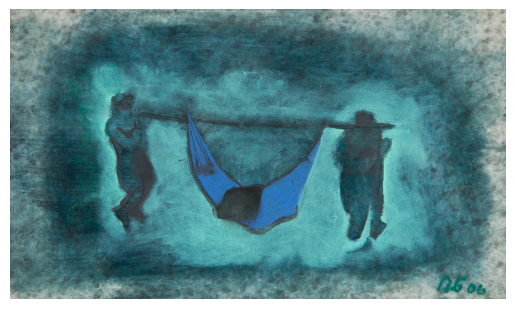

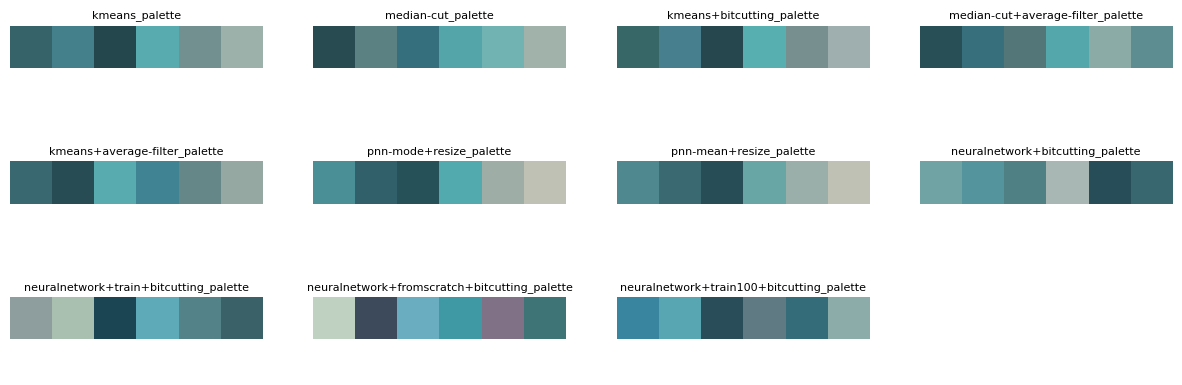

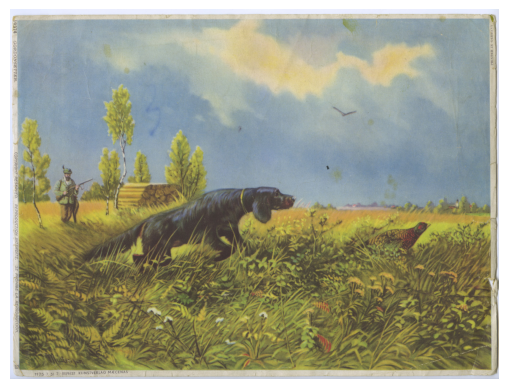

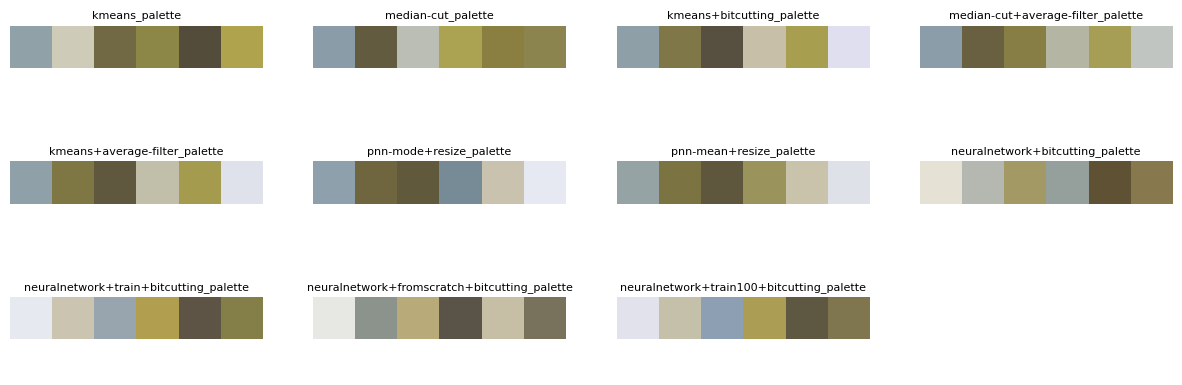

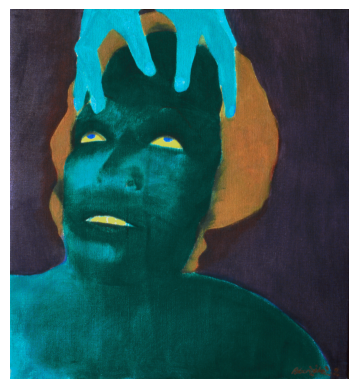

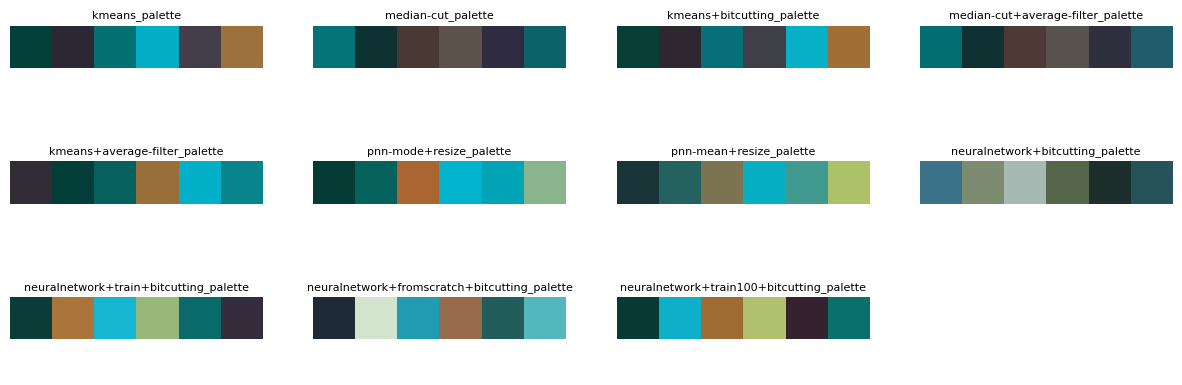

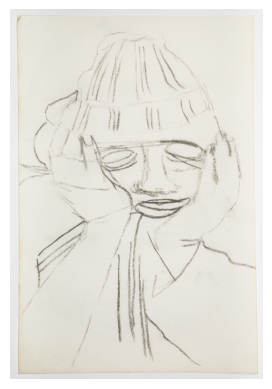

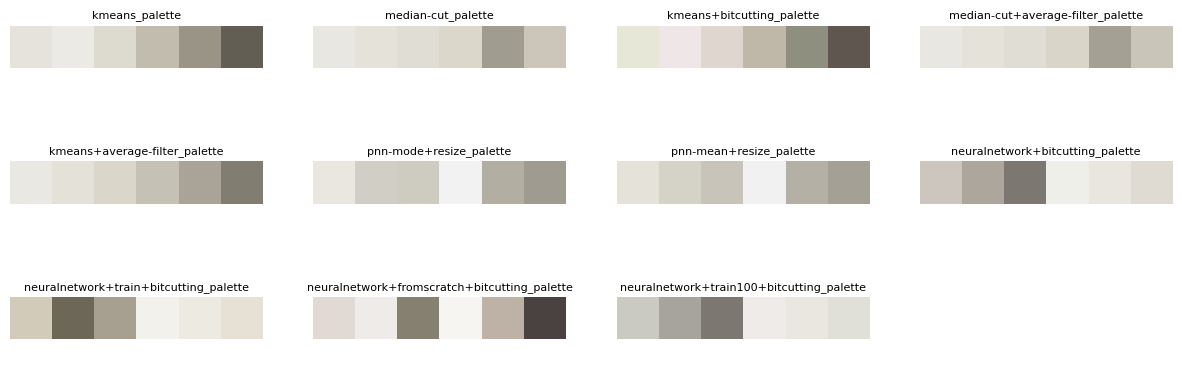

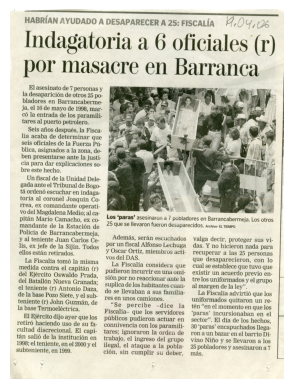

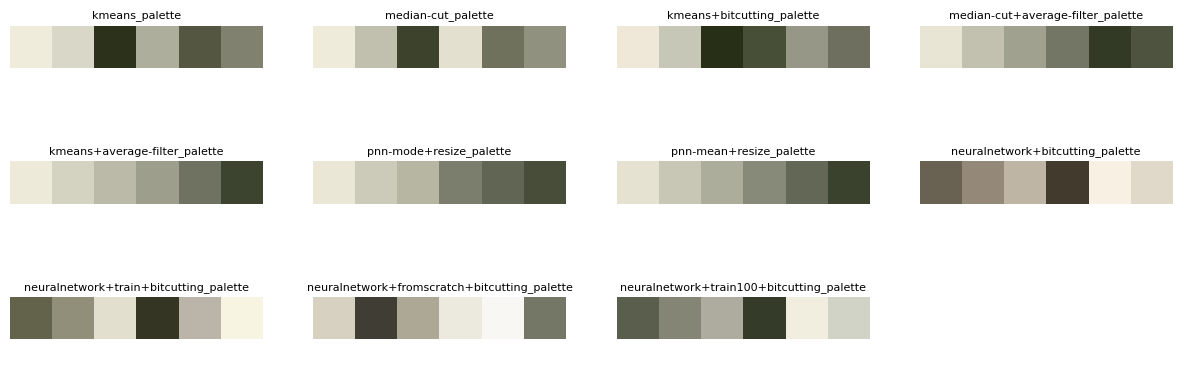

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from palette_creator import compare_palettes
import pandas as pd
from pathlib import Path

PATH_IMAGES_FOLDER = Path('data/beatriz_gonzalez')
db = pd.read_csv(Path("beatriz_gonzalez.csv"))

methods = [method for method in db.keys() if '_palette' in method]
sample = db.sample(5)
palettes = sample[methods].values
names = sample[methods].keys()
img_file = sample['filename'].values

for i in range(len(palettes)):
    img = plt.imread(PATH_IMAGES_FOLDER/img_file[i])
    compare_palettes(palettes[i], names, color_size=10, img=img)

La metodología empleada para la evaluación y diagnóstico de los mejores métodos fue la siguiente:
1. Evaluación objetiva:
    * Obtener todas las paletas de colores de las imagenes para cada método
    * Cuantizar cada imagen con cada paleta del método y sacar el MSE de cada método para cada imagen
2. Evaluación subjetiva:
    * Evaluar aleatoriamente 20 imágenes y las paletas de color de los métodos para cada imagen. Darle a cada paleta una puntuación de 5 (excelente representación de la imagen), 4 (buena representación), 3 (regular representación, 2 (mala representación) 1 (no parece una paleta de la imagen). Luego promedio los 20 resultados para cada método y rankear los mejores.

Se trabajó y evaluó sober aproximadamente 1238 imágenes que hacen parte de la colección de Beatriz González. La gráfica a continuación muestra para cada imagen los MSE de los métodos. Adicionalmente se muestra en linea el promedio de las métricas MSE. 

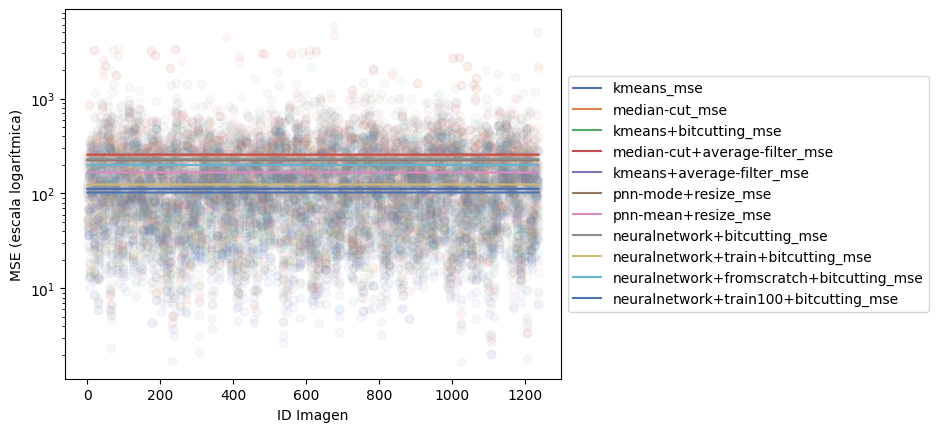

In [4]:
import seaborn as sns
sns.set_palette("deep")
for col in db[[col for col in db.columns if "_mse" in col]]:
    plt.scatter(x=range(len(db)), y=db[col], alpha=0.05)
    plt.plot(range(len(db)), [db[col].mean()]*len(db), label=f"{col}")
    plt.yscale("log")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("MSE (escala logarítmica)")
plt.xlabel("ID Imagen")
plt.show()

**Figura 2** Resultado de MSE entre la imagen original y el centroide más cercano, se grafica también el resultado promedio por cada método.

Por MSE, que es la métrica tradicionalmente usada para problemas de cuantización de color, los métodos de redes neuronales y KMeans obtuvieron los mejores resultados mientras que los métodos de PNN y Median-cut arrojaron los peores resultados. Por otro lado, las técnicas de preprocesamiento no parecen tener grandes efectos en los resultados.

A continuación se agrega el rating de los métodos (evaluación subjetiva) y se muestra en una tabla los resultados.

In [51]:
methods, metrics = [], []
for col in db[[col for col in db.columns if "_mse" in col]]:
    methods.append(col.split("_")[0])
    metrics.append(db[col].mean())
methods_metric = pd.DataFrame()
methods_metric.index = methods
methods_metric["MSE"] = metrics
methods_metric= methods_metric.sort_values("MSE")
rating = [4.3, 4.6, 4.4, 4.8, 4.6, 3.9, 3.8, 3.8, 3.6, 3.2, 3.1]
methods_metric["Rating"] = rating
methods_metric.sort_values("Rating", ascending=False)

,MSE,Rating
neuralnetwork+train100+bitcutting,112.107904,4.8
kmeans+bitcutting,111.482610,4.6
neuralnetwork+train+bitcutting,124.445993,4.6
kmeans+average-filter,111.788849,4.4
kmeans,102.409786,4.3
pnn-mean+resize,166.632556,3.9
neuralnetwork+fromscratch+bitcutting,199.225484,3.8
pnn-mode+resize,224.225970,3.8
neuralnetwork+bitcutting,230.129500,3.6
median-cut,252.504858,3.2


**Tabla 1** Resultados cuantitativos y cualitativos de los métodos de cuantización de color

En la **Tabla 1** puede observarse como la evaluación cualitativa de cada uno de los métodos guarda cierta correlación con la métrica del MSE, siendo los métodos de redes neuronales y de KMeans los mejores. Sin embargo, se resalta el resultado del modelo neuralnetwork+train100+bitcutting, modelo el cual se entrenó con 100 épocas sobre las 50 mil imágenes del National Gallery Art, y se hizo fine tuning con 20 épocas en la colección de Beatriz Gonzáles.


# Discusión y conclusiones

El desempeño en términos generales fue el esperado. Se logró capturar paletas de color que representan correctamente una imagen tanto en métodos del estado del arte como en métodos propuestos. Se expone un método novedoso en la definición de la función de pérdida para el desarrollo de la red neuronal. Se cumplió con el objetivo del BADAC que fue generar paletas de colores para las imágenes de la colección de Beatriz González y la automatización de esta herramienta a partir de una librería en python.

Por otro lado, se observa un problema en la sensibilidad del parámetro de la función de pérdida. Cuando este parámetro se pone en un número alto, se distorsiona demasiado la paleta de colores. Una posible hipótesis es el espacio de color utilizado. En la literatura se expone que el espacio RGB no es un espacio perceptualmente uniforme (es una subvariaedad del espacio $\mathbb{R}^3$) y por tanto esto puede generar distorsiones en las distancias. De hecho, se suelen utilizar espacios aproximadamente uniformes con distancias distintas a la euclideana para solventar un poco este problema.

Podemos concluir que cumplimos con los objetivos del BADAC y de la investigación al explorar distintas metodologías para la generación de paletas de colores de imágenes. Como trabajo futuro, puede ser interesante analizar otros espacios de color que sean considerados perceptualmente uniformes con métricas más acordes. 


# Bibliografía

* Celebi, M.E. Forty years of color quantization: a modern, algorithmic survey. Artif Intell Rev 56,
13953–14034, 2023.
* Thompson, S., Celebi, M.E. and Buck, K.H. Fast color quantization using MacQueen’s k-means
algorithm. J Real-Time Image Proc 17, 1609–1624, 2020.
* JSteven Segenchuk. (1997, May 5). An Overview of Color Quantization Techniques [Online]. Avai-
lable: https://web.cs.wpi.edu/~matt/courses/cs563/talks/color_quant/CQindex.html
* Median cut [Online]. Available: https://en.wikipedia.org/wiki/Median_cut#Implementation_
of_color_quantization
* Virmakoki, O., Franti, P. Fast pairwise nearest neighbor based algorithm for multilevel thresholding. Journal of Electronic Imaging 12(4), 648–659, 2003.